## Importing Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

The MNIST dataset is a widely-used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 to 9), along with their corresponding labels. The dataset contains 60,000 training images and 10,000 testing images.



In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [ ]:
print('Shape of training images :',X_train.shape)
print('Shape of test images :',X_test.shape)
print('Shape of y_trsin :', y_train.shape)
print('Shape of y_test :', y_test.shape)

Shape of training images : (60000, 28, 28)
Shape of test images : (10000, 28, 28)
Shape of y_trsin : (60000,)
Shape of y_test : (10000,)


## Image visualisation

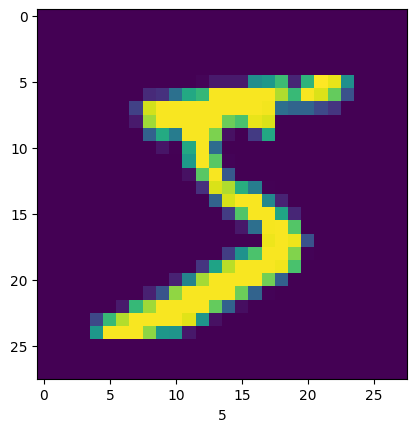

In [ ]:
def visualise(image, label):
  plt.imshow(image)
  plt.xlabel(label)

visualise(X_train[0], y_train[0])

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Normaization of data

In [ ]:
X_train = X_train/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Modelling

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(300, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2202 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0590 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0316 - accuracy: 0.9899


In [ ]:
X_test = X_test/255
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 3ms/step


### Accuracy report

In [ ]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.95      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## CNN model

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(300, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1405 - accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9945
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0109 - accuracy: 0.9966


In [ ]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       1.00      0.99      0.99      1146
           2       0.99      0.98      0.99      1038
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98      1008
           5       0.99      0.98      0.98       896
           6       0.99      0.98      0.98       963
           7       0.98      0.99      0.99      1022
           8       0.98      0.99      0.98       965
           9       0.95      0.99      0.97       963

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

